In [32]:
from inference.run_inference import scrape_and_predict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sentiment, text_sentiment, tweet_df = scrape_and_predict()

Using custom data configuration SetFit--tweet_sentiment_extraction-bee4b4571daa6a0e
Reusing dataset json (C:\Users\20172613\.cache\huggingface\datasets\json\SetFit--tweet_sentiment_extraction-bee4b4571daa6a0e\0.0.0\ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/2 [00:00<?, ?it/s]

1001it [00:36, 27.65it/s]                         


  0%|          | 0/1001 [00:00<?, ?it/s]

In [49]:
tweet_df['sentiment_label'] = text_sentiment

In [57]:
def plot_sentiment(tweet_df):
    sent_cl = np.unique(tweet_df["sentiment_label"])

    counts = [np.sum(np.array(tweet_df['sentiment_label']) == cl) for cl in sent_cl]

    fig, ax = plt.subplots(1,1)

    ax.bar(sent_cl, counts)
    return

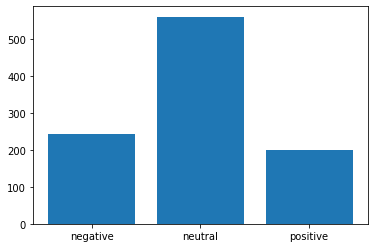

In [58]:
plot_sentiment(tweet_df)

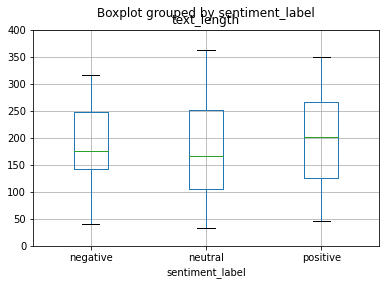

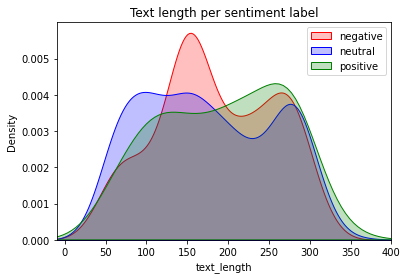

In [48]:
def plot_text_lengths(tweet_df):
    fig, ax = plt.subplots(1,1)
    sns.kdeplot(tweet_df['text_length'][tweet_df['sentiment_label'] == 'negative'], shade=True, color="r", ax=ax, label="negative")
    sns.kdeplot(tweet_df['text_length'][tweet_df['sentiment_label'] == 'neutral'], shade=True, color="b", ax=ax, label="neutral")
    sns.kdeplot(tweet_df['text_length'][tweet_df['sentiment_label'] == 'positive'], shade=True, color="g", ax=ax, label="positive")
    ax.set_xlim(-10, 400)
    ax.legend()
    ax.set_title("Text length per sentiment label")

plot_text_lengths(tweet_df)